In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:/tmp/chicago/plans/trips.csv.gz")

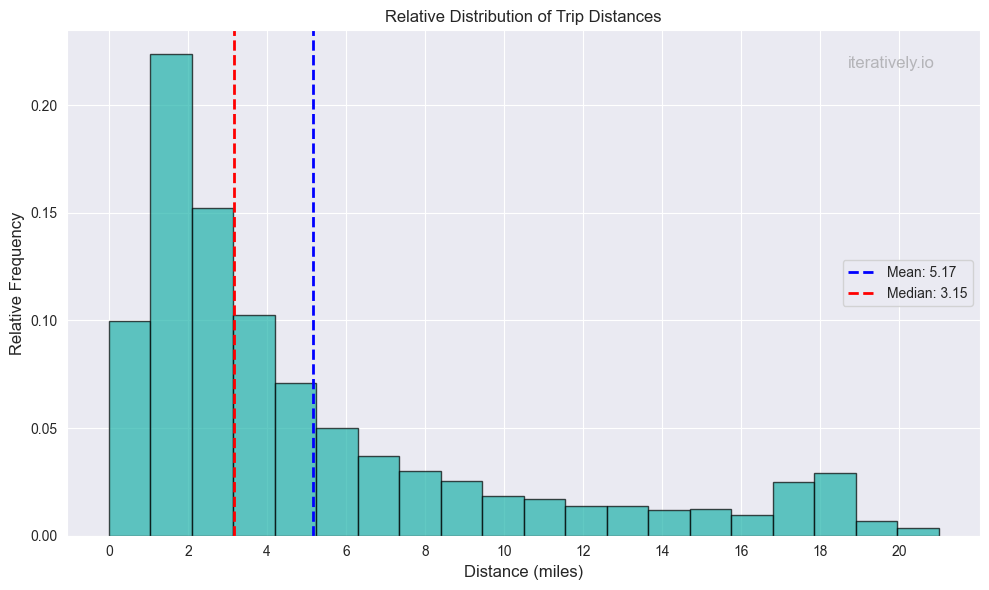

In [46]:

# Create a trip distance distribution
sns.set_style("darkgrid")
distanceFilter = df['distance_miles'].quantile(0.99)
filtered_df = df[df['distance_miles'] <= distanceFilter]
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(filtered_df['distance_miles'], bins=20, density=True, alpha=0.7, color="lightseagreen", edgecolor='black')
ax.set_title('Relative Distribution of Trip Distances', fontsize=12)
ax.set_xlabel('Distance (miles)', fontsize=12)
ax.set_ylabel('Relative Frequency', fontsize=12)
ax.grid(True)

range_max = filtered_df['distance_miles'].max()
xticks = np.arange(0, range_max, 2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.0f}" for tick in xticks])


ax.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray', ha='right', va='top', alpha=0.5, transform=ax.transAxes)

mean_distance = filtered_df['distance_miles'].mean()
median_distance = filtered_df['distance_miles'].median()
ax.axvline(mean_distance, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_distance:.2f}')
ax.axvline(median_distance, color='red', linestyle='--', linewidth=2, label=f'Median: {median_distance:.2f}')
ax.legend()

plt.tight_layout()
plt.savefig("relative_trip_distribution.png")


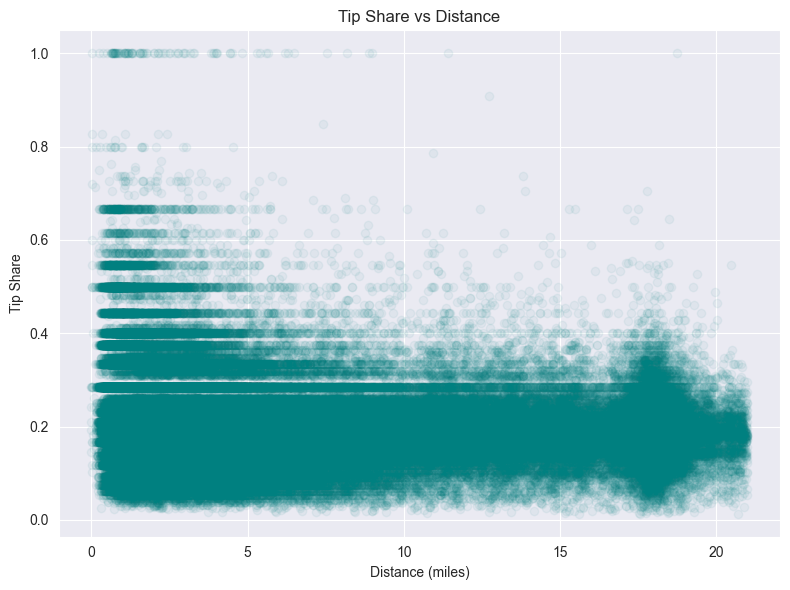

In [43]:

distanceFilter = df['distance_miles'].quantile(0.99)
tip_df = df[(df['distance_miles'] <= distanceFilter) & (df['tip_share'] > 0)]
plt.figure(figsize=(8, 6))
plt.scatter(tip_df['distance_miles'], tip_df['tip_share'], alpha=0.05, color='teal')
plt.title('Tip Share vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Tip Share')
plt.grid(True)
plt.tight_layout()
plt.savefig("tip_share_vs_distance.png")
